In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

In [ ]:
train_df = pd.read_csv("dataset/data/ECG5000_TRAIN.txt", header=None, delim_whitespace=True)
test_df = pd.read_csv("dataset/data/ECG5000_TEST.txt", header=None, delim_whitespace=True)

full_df = pd.concat([train_df, test_df], ignore_index=True)

X = full_df.drop(columns=[0])
y = full_df[0]

X = (X - X.mean(axis=1).values.reshape(-1, 1)) / X.std(axis=1).values.reshape(-1, 1)
X = X.fillna(0)

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

for df in [train_df, val_df, test_df]:
    df.rename(columns={0: "Label"}, inplace=True)
    df["Label"] = df["Label"] - 1

print("Class distribution (after label adjustment):")
for name, df in zip(["Train", "Validation", "Test"], [train_df, val_df, test_df]):
    print(f"{name}:\n{df['Label'].value_counts(normalize=False)}\n")

output_dir = "dataset/data/processed"
os.makedirs(output_dir, exist_ok=True)

train_df.to_csv(os.path.join(output_dir, "train_split.csv"), index=False)
val_df.to_csv(os.path.join(output_dir, "val_split.csv"), index=False)
test_df.to_csv(os.path.join(output_dir, "test_split.csv"), index=False)

C:\Users\afons\AppData\Local\Temp\ipykernel_12472\4083761739.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_df = pd.read_csv("dataset/data/ECG5000_TRAIN.txt", header=None, delim_whitespace=True)
C:\Users\afons\AppData\Local\Temp\ipykernel_12472\4083761739.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_df = pd.read_csv("dataset/data/ECG5000_TEST.txt", header=None, delim_whitespace=True)


Class distribution (after label adjustment):
Train:
Label
0.0    1751
1.0    1061
3.0     116
2.0      58
4.0      14
Name: count, dtype: int64

Validation:
Label
0.0    584
1.0    353
3.0     39
2.0     19
4.0      5
Name: count, dtype: int64

Test:
Label
0.0    584
1.0    353
3.0     39
2.0     19
4.0      5
Name: count, dtype: int64

Data normalized and splits saved successfully!


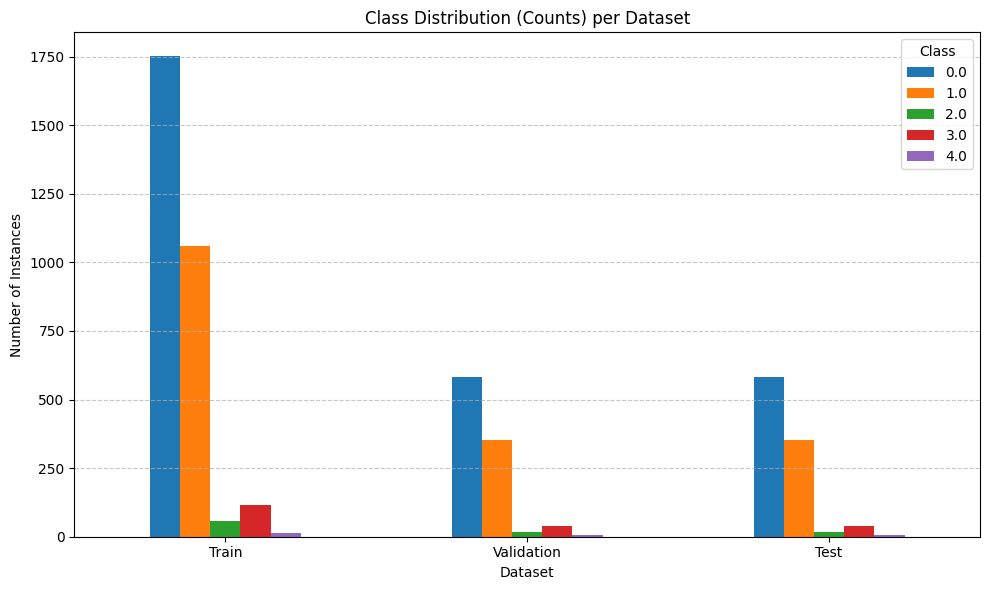

In [3]:
train_counts = train_df["Label"].value_counts().sort_index()
val_counts = val_df["Label"].value_counts().sort_index()
test_counts = test_df["Label"].value_counts().sort_index()

counts_df = pd.DataFrame({
    'Train': train_counts,
    'Validation': val_counts,
    'Test': test_counts
}).fillna(0).astype(int)

counts_df = counts_df.T

ax = counts_df.plot(kind='bar', figsize=(10, 6))
plt.title('Class Distribution (Counts) per Dataset')
plt.xlabel('Dataset')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.legend(title='Class', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()